<a href="https://colab.research.google.com/github/guilhermesilveira/theeconomist-scientificpublishing-and-gender/blob/master/The_Economist_Scientific_publishing_and_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple attempt on a Economist graph

Sarah Leo, a visual data journalist at The Economist made an amazing post about improvements they could have done to previously published charts. One of the charts is a challenge I tried to address here.

The original article: https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368

My approach is to focus on the main history: gender inequality by country and by area of study. Further improvements can be made on color and so on.

In [0]:
column_names = ["Country", "Health sciences", "Physical sciences", "Engineering", "Computer science, maths", "% of women inventores"]

data = [
["Japan", 0.24, 0.11, 0.11, 0.11, 0.08],
["Chile", 0.43, 0.23, 0.22, 0.16, 0.19],
["United Kingdom", 0.45, 0.21, 0.22, 0.21, 0.12],
["United States", 0.46, 0.2, 0.22, 0.22, 0.14],
["Mexico", 0.46, 0.25, 0.26, 0.22, 0.18],
["Denmark", 0.47, 0.22, 0.23, 0.18, 0.13],
["EU28", 0.48, 0.25, 0.25, 0.22, 0.12],
["France", 0.48, 0.24, 0.25, 0.22, 0.17],
["Canada", 0.49, 0.21, 0.22, 0.22, 0.13],
["Australia", 0.5, 0.23, 0.25, 0.24, 0.12],
["Brazil", 0.57, 0.33, 0.32, 0.24, 0.19],
["Portugal", 0.57, 0.37, 0.36, 0.27, 0.26]   
]

In [0]:
import pandas as pd

df = pd.DataFrame(data, columns=column_names)

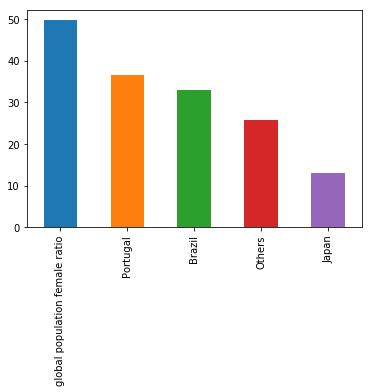

In [44]:
means_per_country = df.set_index("Country").T.mean()
means_global = (1 - 1.015/2.015) * 100 # https://en.wikipedia.org/wiki/List_of_countries_by_sex_ratio
means_per_country_others = (means_per_country.values.sum() - means_per_country[["Brazil", "Portugal", "Japan"]].values.sum()) / (means_per_country.count()-3) * 100
means_per_country_Brazil = means_per_country[["Brazil"]].values.sum() * 100
means_per_country_Portugal = means_per_country[["Portugal"]].values.sum() * 100
means_per_country_Japan = means_per_country[["Japan"]].values.sum() * 100
means_per_country_rebuilt = pd.Series([
    means_global,
    means_per_country_Portugal,
    means_per_country_Brazil,
    means_per_country_others,
    means_per_country_Japan
], index = ["global population female ratio", "Portugal", "Brazil", "Others", "Japan"])
means_per_country_rebuilt.plot(kind='bar');

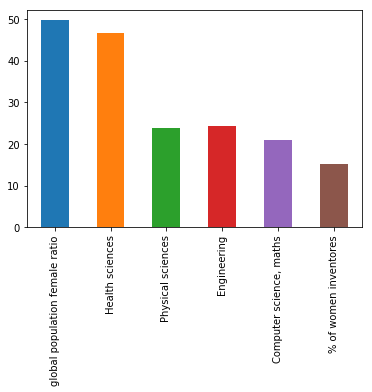

In [48]:
means_per_area = pd.Series(means_global, index=["global population female ratio"])
means_per_area = means_per_area.append(df.mean() * 100)
means_per_area.plot(kind='bar');